## Group 3 Week 5

1. Consider the fixed-point iteration described by
    $$
    \begin{aligned}
    x_{n+1}= g( x_n)= \frac{1}{2}\left(x_n+\frac{a^2}{x_n}\right)\end{aligned}
    $$
    Show that the iteration converges to $a$ for any initial point $x_1 > 0$, and that the convergence is quadratic.

**Convergence :**  
Notice that, for $x_1 \gt 0$ 

$$
x_2 = \frac{1}{2}\left(x_1+\frac{a^2}{x_1^2}\right)\ge a
$$

if $x_1 = a$, then $x_n = a$, for n range from 1 to infty,  
if $x_1 \not= a$, $x_2 > a$,for $n \gt 2$
$$
g'(x) = \frac{1}{2}\left(1-\frac{a^2}{x^2}\right)
$$
so $|g'(x)|<\frac{1}{2}$
so $|e_n|\le \left(\frac{1}{2}\right)^n|e_1|$, it must convergence.  
As $x_n$ convergence, $x_{n+1}=x_n = x$
$$
x = \frac{1}{2}\left(x+\frac{a^2}{x^2}\right)
$$
We get $x = a$, that means $x$ will convergence to $a$  


**Rate of Convergence:**  
$$
x_{n+1}=g(x_n)\quad x^*=g(x^*)
$$
and $g'(a)=0$  

$$
\begin{aligned}
\lim_{n\rightarrow\infty}\frac{|x_{n+1}-x^*|}{(x_n-x^*)^2}&=\lim_{n\rightarrow\infty}\frac{g(x_n)-g(x^*)}{(x_n-x^*)^2}\\
&=\lim_{n\rightarrow\infty}\frac{g''(\xi_n)(x_n-x^*)^2}{2(x_n - x^*)^2}=\frac{g''(x^*)}{2}
\end{aligned}
$$

so the convergence is quadratic 

2. A particle of mass $m$ is bound within a 1-D square well of radius $a$
    $$
    V\left(  x\right)  = \begin{cases}
    -V_{0}, & \text{for }\left\vert x\right\vert \leq a,\\
    0, & \text{for }\left\vert x\right\vert \geq a
    \end{cases}
    $$
    Quantum Mechanics shows that the energies of the bound states $E<0$ are solutions of the transcendental equations
    $$
    \begin{aligned}
    \sqrt{10+E}\tan\left(  \sqrt{10+E}\right)    & =\sqrt{-E}\;\left(
    \text{even}\right)  \\
    \sqrt{10+E}\cot\left(  \sqrt{10+E}\right)    & =-\sqrt{-E}\;\left(  \text{odd}\right)\end{aligned}
    $$
    where even and odd refer to the symmetry of the wave function. Here we have chosen units such that $\hbar=1,$ $2m=1,$ $a=1$, and $V_{0}=10.$

    a) Find several bound-state energies for even wave function.

    b) See if making the potential deeper, say, by changing the 10 to a 20, or a 30, produces a larger number of, or deeper bound states. Also make the potential shallower, and see how the energies change. Please make a diagram of the ground state energy versus the depth of the potential.

If depth = 10, bound-state energy equals: [-8.592785275182328, -0.004019262390332416]

If alter the depth of potential, the ground-state energy will change as:


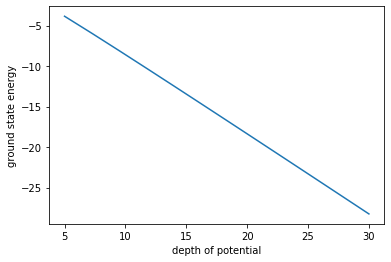

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# By definition, -10 < E < 0.
Emin, Emax, depth = -10, 0, np.linspace(5,30,12)
E = np.linspace(Emin,Emax,1000)

def bisection(f,left,right):
    # Carry out bisection algorithm to find solution between given section.
    # f is the input function; left and right is the two start side
    tolerance = 1e-10
    while abs(right-left) > tolerance:
        mid = (left + right) / 2
        if f(mid) == 0:
            break
        else:
            if f(mid)*f(right) < 0:
                left = mid
            else:
                right = mid
    return mid

def diff_depth(depth):
    # Since tan(x) grows too sharp near pi/2, thus I mutiplies exp(E) on both sides
    Emin, Emax = -depth, 0 
    E = np.linspace(Emin,Emax,1000)
    left = np.sqrt(depth+E)*np.tan(np.sqrt(depth+E)) * np.exp(E)
    right = np.sqrt(-E) * np.exp(E)
    last_compair = left[0] > right[0]  # Initialize for the first run
    roots = []  # Container for the roots.
    
    # Build the function to carry out bisection. 
    def EE(E):
        result = np.exp(E)*(np.sqrt(depth+E)*np.tan(np.sqrt(depth+E))-np.sqrt(-E))
        return result
    
    # Then find the turing point.
    for idx,e in enumerate(E):
        compair = left[idx] > right[idx]
        if last_compair != compair:
            root = bisection(EE,E[idx-1],E[idx])
            # Attention! 'tan(x)' is not contineous for all x 
            # so we need to check out whether it is a solution. 
            if abs(EE(root)) < 1e-8:
                roots.append(root)
        last_compair = compair
    return roots

print("If depth = 10, bound-state energy equals: {}\n".format(diff_depth(10)))

# If the depth of potential changes, so does the range of E.
# In general, -depth < E < 0.
roots = []
for dep in depth:
    roots.append(min(diff_depth(dep)))
plt.plot(depth,roots)
plt.xlabel("depth of potential")
plt.ylabel("ground state energy")
print("If alter the depth of potential, the ground-state energy will change as:")
plt.show()

3. Find the bond length of NaCl using the potential model discussed in the lecture, 
    $$
    V(r)=-\frac{e^2}{r}+V_0 \exp(-r/r_0)
    $$
    Please use $e^2=14.4$ $\text{Å}\cdot eV$, $V_0=1.09\times 10^3 \text{ eV}$, $r_0=0.330\text{ Å}$. Write your own program and compare your result with the results from Python package `scipy.optimize`[^1]

In [4]:
import numpy as np

def bic(f,left,right):   #二分法求根的大概范围
    while True:
        if abs(left - right) / abs(right + left ) < 1e-6:
            return left,right
        elif f(left)*f((right + left)/2 ) > 0:
            left = (left+right)/2
        else:
            right = (left+right)/2

def secant(f,x0,x1):     #范围精度够高后换secant算法收敛更快
    count = 30
    while abs(x0-x1)>1e-16:
        x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        x0 = x1
        x1 = x2
        count = count - 1
        if count == 0:
            break
    return x1
            
V = lambda r: - 14.4/r + 1.09e3*np.exp(-r/0.330)
V_star = lambda r: 14.4/r - 1.09e3*np.exp(-r/0.330)
V1 = lambda r: 14.4 / (r*r) - 1.09e3/0.330*np.exp(-r/0.330)

x = secant(V1,bic(V1,0.01,0.1)[0],bic(V1,0.01,0.1)[1])
print(f'x_calc = {x}')

import scipy.optimize as sco
result = sco.minimize(V_star,0.04)
print(f'x from scipy:{result.x[0]:.16}')

error_r = abs(x - result.x[0])/(x + result.x[0])
print(f'relative diff = {error_r}')
print('将给出的x带入到导数里：')
print(f'V1(x_calc) = {V1(x)}')
print(f'V1(x_scipy) = {V1(result.x[0])}')

x_calc = 0.0738441389366838
x from scipy:0.07384413149617723
relative diff = 5.037980707722287e-08
将给出的x带入到导数里：
V1(x_calc) = 4.547473508864641e-13
V1(x_scipy) = 0.0004726244119410694


4. Consider the nonlinear system 
    $$
    \begin{cases}
    2e^x+y=0\\
    3x^2+4y^2=8
    \end{cases}
    $$
    a) Locate the roots graphically.

    b) Based on the location of the roots, find the roots and compare your numerical results with the results from Python package `scipy.optimize`[^1]

    [^1]: (https://docs.scipy.org/doc/scipy/reference/optimize.html).

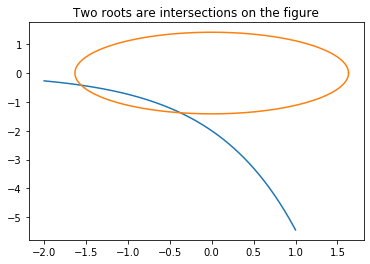

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import symbols, diff, exp
from scipy.optimize import minimize
# a) =======================================================
x1 = np.linspace(-2, 1, 201)
y1 = -2 * np.exp(x1)

theta = np.linspace(0, 2*np.pi, 200)
x2 = np.cos(theta) * np.sqrt(8/3)
y2 = np.sin(theta) * np.sqrt(2)

plt.figure()
plt.plot(x1, y1, label='curve 1')
plt.plot(x2, y2, label='curve 2')
plt.title("Two roots are intersections on the figure")
plt.show()
plt.close()

In [6]:
# b) ===============================================
def NewtonMethod(F, J, x, precision=1e-2, max_rd=100, learning_rate=0.001, show_fig=False):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2) 
    rd = 0

    if show_fig:
        plt.figure()
        plt_x = []
        plt_y = []

    while abs(F_norm) > precision:
        delta = np.linalg.solve(J(x), F_value) 
        x -= delta * learning_rate
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        rd += 1
        if show_fig:
            plt_x.append(x[0])
            plt_y.append(x[1])

        if rd > max_rd:
            print(f"Method failed in {rd:d} steps.")
            if show_fig:
                plt.scatter(plt_x, plt_y)
                plt.show()
                plt.close()
            return [None, rd]
    if show_fig:
        plt.scatter(plt_x, plt_y)
        plt.show()
        plt.close()
    return x, rd

sym_x, sym_y = symbols("sym_x sym_y")
F0 = 2 * exp(sym_x) + sym_y
F1 = 3 * sym_x**2 + 4 * sym_y**2 - 8

print(diff(F0, sym_x))
print(diff(F0, sym_y))
print(diff(F1, sym_x))
print(diff(F1, sym_y))

2*exp(sym_x)
1
6*sym_x
8*sym_y


In [7]:
def F(arr):
    x, y = arr
    return np.array([2 * np.exp(x) + y,
        2 * x**2 + 4 * y**2 - 8])
def J(arr):
    x, y = arr
    return np.array([[2 * np.exp(x), 1],
        [6 * x, 8 * y]])
def F_target(arr):
    return np.linalg.norm(F(arr), ord=2)

root1, _ = NewtonMethod(F, J, [-2, -2*np.exp(-2)], show_fig=False, max_rd=100, learning_rate=1, precision=1e-7)
root2, _ = NewtonMethod(F, J, [0, -2], show_fig=False, max_rd=100, learning_rate=1, precision=1e-7)
print("solve by Newton method: ")
print("\troot1: ", root1, "\n\troot2: ",  root2)

root1 = minimize(F_target, [-2, -2*np.exp(-2)])
root2 = minimize(F_target, [0, -2])
print("solve by scipy.optimize: ")
print("\troot1: ", root1['x'], "\n\troot2: ",  root2['x'])

solve by Newton method: 
	root1:  [-1.95990875 -0.28174255] 
	root2:  [-0.3633555  -1.39067839]
solve by scipy.optimize: 
	root1:  [-1.95990876 -0.28174252] 
	root2:  [-0.3633555  -1.39067839]


5. Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by its augmented matrix 
    $$
    \begin{bmatrix}
    \left.\begin{matrix}\varepsilon & 1\\
    1 & 1
    \end{matrix}\right\vert
    \begin{matrix}
    2\\
    1
    \end{matrix}\end{bmatrix}
    $$
    where $\epsilon > 0$ is a very small constant.

    a) Solve by Gauss elimination without partial pivoting.

    b) Solve by Gauss elimination with partial pivoting. Compare the results and discuss their validity.



a)
$$
\left[
\begin{matrix}
1 & 0\\
-\frac{1}{\varepsilon} & 1
\end{matrix}
\right]
\begin{bmatrix}
\left.\begin{matrix}\varepsilon & 1\\
1 & 1
\end{matrix}\right\vert
\begin{matrix}
2\\
1
\end{matrix}\end{bmatrix} = 
\begin{bmatrix}
\left.\begin{matrix}\varepsilon & 1\\
0 & 1-\frac{1}{\varepsilon}
\end{matrix}\right\vert
\begin{matrix}
2\\
1 - \frac{2}{\varepsilon}
\end{matrix}\end{bmatrix}
$$
we get:
$$
x1 = \frac{1-\frac{2}{\varepsilon} }{1-\frac{1}{\varepsilon}},\quad x0= \left(2 - \frac{1-\frac{2}{\varepsilon} }{1-\frac{1}{\varepsilon}}\right)/\varepsilon = (2-x1)/\varepsilon
$$

In [8]:
# try with code
for i in range(3):
    eps = float(input('input a small constant:'))
    x1 = (1 - 2/eps )/(1 - 1/eps )
    x0 = (2 - x1) / eps
    print(f'x0 = {x0},  x1 = {x1}')
    M = np.matrix([[eps,1],[1,1]])
    X = np.matrix([[x0],[x1]])
    print(f'M*X = ')
    print(M@X)

x0 = -1.0001000100023916,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]
x0 = -1.0001000100023916,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]
x0 = -1.0001000100023916,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]


b)
$$
\left[\begin{matrix}
0 & 1\\
1 & 0
\end{matrix}\right] \begin{bmatrix}
\left.\begin{matrix}\varepsilon & 1\\
1 & 1
\end{matrix}\right\vert
\begin{matrix}
2\\
1
\end{matrix}\end{bmatrix} = 
\begin{bmatrix}
\left.\begin{matrix}1 & 1\\
\varepsilon & 1
\end{matrix}\right\vert
\begin{matrix}
1\\
2
\end{matrix}\end{bmatrix}
$$

$$
\left[\begin{matrix}
1 & 0\\
-\varepsilon & 1
\end{matrix}\right] \begin{bmatrix}
\left.\begin{matrix}1 & 1\\
\varepsilon & 1
\end{matrix}\right\vert
\begin{matrix}
1\\
2
\end{matrix}\end{bmatrix} = 
\begin{bmatrix}
\left.\begin{matrix}1 & 1\\
0 & 1 - \varepsilon
\end{matrix}\right\vert
\begin{matrix}
1\\
2 - \varepsilon
\end{matrix}\end{bmatrix}
$$

so get
$$
x1 = \frac{2-\varepsilon}{1-\varepsilon},\quad x0 = 1 - x1
$$

In [9]:
# try with code
for i in range(3):
    eps = float(input('input a small constant:'))
    x1 = (2 - eps )/(1 - eps )
    x0 = 1 - x1
    print(f'x0 = {x0},  x1 = {x1}')
    M = np.matrix([[eps,1],[1,1]])
    X = np.matrix([[x0],[x1]])
    print(f'M*X = ')
    print(M@X)

x0 = -1.0001000100010002,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]
x0 = -1.0001000100010002,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]
x0 = -1.0001000100010002,  x1 = 2.0001000100010002
M*X = 
[[2.]
 [1.]]


不选主元可以看到反过来求$MX$的值随着$\varepsilon$的变小误差越来越大，取主元后，不在有这样的现象。不取主元的截断误差被放大，显然取主元的方法更有效

6. Solve the system of equations $Ax=b$ with a well-behaved matrix
    $$
    A_{ii}=n,\text{ }A_{i\neq j}=1
    $$
    by applying 

    a) LU decomposition, (Hint: You can use Python module `scipy.linalg.lu_solve`)

    b) Cholesky decomposition, (Hint: You can use Python module `numpy.linalg.cholesky`)

    The right-hand side is $b=A\begin{pmatrix}
    1\\
    2\\
    \vdots\\
    n
    \end{pmatrix}$, hence the exact solution is $x=\begin{pmatrix}
    1\\
    2\\
    \vdots\\
    n
    \end{pmatrix}$.



In [10]:
import scipy
n = 5
A = np.eye(5) * (n-1) + np.ones((5, 5))
x0 = np.reshape(np.linspace(1, n, n), (n, 1))
b = A@x0

# a) =====================================
lu, piv = scipy.linalg.lu_factor(A)
x_solved = scipy.linalg.lu_solve((lu, piv), b)
print("solved by lu_solve")
print(x_solved)

# b) ====================================
def get_L_inv(L, dim): 
# get inverse of a low triangular matrix
    result = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            if i == j:
                result[i, j] = 1 / L[i, j]
            elif i > j:
                result[i, j] = -L[i, :i]@result[:i, j]
                result[i, j] /= L[i, i]
 
    return result

L = np.linalg.cholesky(A)
L_inv = get_L_inv(L, n)
x_solved = np.transpose(L_inv) @ L_inv @ b 
print("solved by cholesky")
print(x_solved)


solved by lu_solve
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
solved by cholesky
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


7. **Multiple linear regression** generalizes simple linear regression by allowing several predictor variables instead of just one.    
   We model the response $y=a_{0}+a_{1}x_{1}+\cdots+a_{p}x_{p}$. Now, we have a sequence of $n$ response values $y_{i}$, and a sequence of $n$ predictor vectors $(x_{i1},x_{i2},\cdots,x_{ip})$. The goal is to estimate the parameter vector $(a_{0},\cdots,a_{p})$ so as to minimize the sum of the squared errors.   
   In matrix notation, we have an overdetermined system of equations 
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   \begin{pmatrix}
   y_{1}\\
   y_{2}\\
   \vdots\\
   \\
   \\
   y_{n}%
   \end{pmatrix}=\begin{pmatrix}
   1 & x_{11} & x_{12} & \cdots & x_{1p}\\
   1 & x_{21} & x_{22} & \cdots & x_{2p}\\
   \vdots & \vdots & \ddots &  & \vdots\\
   &  &  &  & \\
   1 &  &  &  & \\
   1 & x_{n1} & x_{n2} & \cdots & x_{np}%
   \end{pmatrix} \begin{pmatrix}
   a_{0}\\
   a_{1}\\
   \vdots\\
   \\
   a_{p}%
   \end{pmatrix}
   $$
   Our goal is to find a vector $\mathbf{a}$ that minimizes $\mathbf{Xa-y}$ . A numerically stable algorithm for computing $\mathbf{a}$ is to compute QR factorization $\mathbf{X=QR}$, then solve the triangular system $\mathbf{Ra=Q^{T}y}$ via back substitution.

   The expression $z = ax^{2} +bxy +cy^{2} +dx +ey +f$ is known as a **quadratic form**. The set of points $(x, y)$, where $z = 0$, is a conic section. It can be an ellipse, a parabola, or a hyperbola, depending on the sign of the discriminant $b^{2}-4ac$. Circles and lines are special cases. The equation $z
    = 0$ can be normalized by dividing the quadratic form by any nonzero coefficient. For example, if $f\neq0$, we can divide all the other coefficients by $f$ and obtain a quadratic form with the constant term equal to one.

    ​	A planet follows an elliptical orbit. Here are ten observations of its position in the $(x, y)$ plane:

    ```
    x = [1.02 .95 .87 .77 .67 .56 .44 .30 .16 .01];
    y = [0.39 .32 .27 .22 .18 .15 .13 .12 .13 .15];
    ```

    a) Determine the coefficients in the quadratic form that fits these data in the least squares sense by setting one of the coefficients equal to one and solving a 10-by-5 overdetermined system of linear equations for the other five coefficients. Plot the orbit with $x$ on the $x$-axis and $y$ on the $y$-axis. Superimpose the ten data points on the plot.

    b) This least squares problem is nearly rank deficient. To see what effect this has on the solution, perturb the data slightly by adding to each coordinate of each data point a random number uniformly distributed in the interval $[-.0005, .0005]$. Compute the new coefficients resulting from the perturbed data. Plot the new orbit on the same plot with the old orbit. Comment on your comparison of the sets of coefficients and the orbits.    
    (Hint:  You can use Python module `numpy.linalg.qr`)

The parameter of quadratic form calculated by original x,y is:
a = [2.25379482]
b = [0.00632471]
c = [5.52218343]
d = [-1.28981021]
e = [-7.3773544]

 The parameter of quadratic form calculated by perturbed x,y is:
a = [2.24813761]
b = [-0.03548386]
c = [5.65212871]
d = [-1.28456982]
e = [-7.38221802]


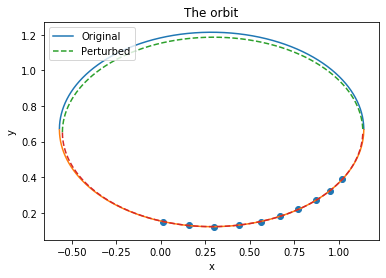

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import isnan
import random
%matplotlib inline

x = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
y = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]

def mutiLinearFit(x,y):
    # For simplicity, I set f = 1, then I need to solve ax^2+bxy+cy^2+dx+ey = -1.
    X = np.ones((len(x),5))
    for i in range(0,len(x),1):
        X[i,:] = [x[i]**2,x[i]*y[i],y[i]**2,x[i],y[i]]  # Write the parameter line by line
    # Use Python module to perform QR factorization
    Q,R = np.linalg.qr(X)
    # Then the problem leaves to solve Ra = Q^T*y.
    right = np.dot(np.transpose(Q),-np.ones((len(y),1)))  # right = Q^T*y
    result = np.linalg.solve(R,right)  # Use numpy module to solve this simple equation
    return result

# Then solve the second problem. First build new x,y
x1,y1 = [],[]
for idx in range(0,len(x)):
    x1.append(x[idx] + random.uniform(-0.0005,0.0005))
    y1.append(y[idx] + random.uniform(-0.0005,0.0005))

result1 = mutiLinearFit(x,y)
result2 = mutiLinearFit(x1,y1)

# Print the result.
print("The parameter of quadratic form calculated by original x,y is:")
for idx,letter in enumerate(['a','b','c','d','e']):
    print("{} = {}".format(letter,result1[idx]))

print("\n The parameter of quadratic form calculated by perturbed x,y is:")
for idx,letter in enumerate(['a','b','c','d','e']):
    print("{} = {}".format(letter,result2[idx]))

# def plotAnonymous(parameter):
# To plot this anonymous function, for each 'x', solve the function
# cy^2 + (bx+e)y + (ax^2+dx+1) = 0

def plotAnonymous(result):
    # The imput 'result' is the output of mutiLinearFit.
    X,x,y1,y2 = np.linspace(-0.75,1.5,90000),[],[],[]
    # Since anonymous function can hardly be expressed as y(x) = 0
    # So for each x, solve the rest formula to achieve y, which has two value y1, y2.
    # In this example, the rest formula is quaratic.
    def PresiceSolutionByFormula(parameter):
        # Solve the quadratic formula in plotAnonymous.
        # Directly use the solution formula.
        a, b, c = parameter
        delta = np.sqrt(b**2 - 4*a*c)
        if b >= 0:
            dom = -b - delta
            return dom / 2 / a, 2 * c / dom
        else:
            dom = -b + delta
            return dom / 2 / a, 2 * c / dom

    for xx in X:
        para = [result[2],(result[1]*xx+result[4]),(result[0]*xx**2+result[3]*xx+1)]
        y_temp = PresiceSolutionByFormula(para)
        if not(isnan(y_temp[0])):
            y1.append(y_temp[0])
            y2.append(y_temp[1])
            x.append(xx)
    return x,y1,y2
    

x1,y11,y12 = plotAnonymous(result1)
x2,y21,y22 = plotAnonymous(result2)


plt.plot(x1,y11,label='Original')
plt.plot(x1,y12)
plt.plot(x2,y21,'--',label='Perturbed')
plt.plot(x2,y22,'--')
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The orbit')
# Finally attach the initial points.
x = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
y = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]
plt.scatter(x,y)
plt.show()

# The original orbit is plotted as solid line, while the perturbed 
# orbit is plotted as dashed line. We can observe that the purtubation 
# has small infect on the side near the fitted data, while have significant
# infect on the side without observed data. This means the fitting 
# is more effective near the given data due to the least squares problem. 